[View in Colaboratory](https://colab.research.google.com/github/kartheikiyer/SEDfitting_code_comparison/blob/master/comparing_100_photoz_fits.ipynb)

# Analysing the effect of using the full photo-z pdf while fitting for M*, SFR. 

This is done by drawing 100 samples from the photo-z distributions for each galaxy that Dritan had compiled and fitting all of them with every participating code. 

We then look at a sample of galaxies at z~1 and quantify the uncertainty introduced due to the width photo-z PDF (as a function of the width, and perhaps other quantities.)

Notebook by Kartheik Iyer. Last updated 18th October 2018.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_style('white')

!pip install astropy
from astropy.io import fits
from astropy.table import Table

from tqdm import tqdm

from google.colab import drive
drive.mount('/content/gdrive')

import os
(os.listdir('/content/gdrive/My Drive/photoz_perturbation_results'))

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['Nima_GOODSS_100_photoz.txt',
 'Dense_Basis_v2.0_goods_s_100_photoz_fits.txt',
 'mederr_GDSS_znew_avgal_newparam_100zp_idboot.fits']

In [0]:
cami_fname = '/content/gdrive/My Drive/photoz_perturbation_results/mederr_GDSS_znew_avgal_newparam_100zp_idboot.fits'
db_fname = '/content/gdrive/My Drive/photoz_perturbation_results/Dense_Basis_v2.0_goods_s_100_photoz_fits.txt'
nima_fname = '/content/gdrive/My Drive/photoz_perturbation_results/Nima_GOODSS_100_photoz.txt'

In [0]:
cami_fits = fits.open(cami_fname)

In [11]:
cami_fits[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  232 / length of dimension 1                          
NAXIS2  =              3493000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   29 / number of table fields                         
TTYPE1  = 'ID      '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'IDboot  '                                                            
TFORM2  = 'K       '                                                            
TTYPE3  = 'logM_50 '        

In [0]:
cami_id = cami_fits[1].data['ID'] - 1
cami_idboot = cami_fits[1].data['IDboot'] - 1
cami_mass = cami_fits[1].data['logM_50']
cami_sfr = cami_fits[1].data['logSFR_50']
cami_Av = cami_fits[1].data['AV_50']

cami_fits.close()

In [15]:
db_table = Table.read(db_fname, format='ascii.commented_header')
db_table

gal_id,pz_id,z_draw,log_mass,log_mass_err_dn,log_mass_err_up,log_sfr_100,log_sfr_100_dn,log_sfr_100_up
int64,int64,float64,float64,float64,float64,float64,float64,float64
0,0,0.52,10.96426848404953,0.1,1.2240864165131828,0.7392208955566976,0.1,30.213736047970322
0,1,0.58,10.825285515103676,0.1,0.4581311009114657,0.9178792188166092,0.1,30.029362495537534
0,2,0.55,10.99576566593417,0.1,0.8632390504705292,0.6719151987362574,0.1,30.036240401943736
0,3,0.54,10.996492055307355,0.1,1.3237692298663397,0.6543299625909659,0.1,30.412505832910625
0,4,0.49,10.760972996526263,1.382517408061375,0.1,0.4419094712312419,0.1,29.98939638825407
0,5,0.49,10.760972996526263,1.382517408061375,0.1,0.4419094712312419,0.1,29.98939638825407
0,6,0.47,10.958852370058128,0.1,0.09481606589005231,-0.1204856203795397,29.615531262650748,0.1
0,7,0.57,10.825285515103676,0.1,0.4540578266268618,0.9178792188166092,0.1,30.029362495537534
0,8,0.54,10.996492055307355,0.1,1.3237692298663397,0.6543299625909659,0.1,30.412505832910625


In [0]:
db_id = db_table['gal_id']
db_idboot = db_table['pz_id']
db_zdraw = db_table['z_draw']
db_mass = db_table['log_mass']
db_sfr = db_table['log_sfr_100']

In [106]:
f = open(nima_fname, 'r')
for i in range(40):
  print(f.readline())
f.close()

# ====================  GOODSS  ====================

# 15 Oct 2018 by:

# Nima Chartab Soltani (UC Riverside)

# Bahram Mobasher (UC Riverside)



# Contact: Nima.ChartabSoltani@email.ucr.edu

# ==================================================

# 1 ID

# 2 z_Best

# 3 E(B-v)

# 4 Rest-frame U/Johnson

# 5 Rest-frame B/Johnson

# 6 Rest-frame V/Johnson

# 7 Rest-frame R/Johnson

# 8 Rest-frame I/Johnson

# 9 Rest-frame J/2mass

# 10 Rest-frame H/2mass

# 11 Rest-frame K/2mass

# 12 Rest-frame UV_1500

# 13 Age_Best

# 14 Age_inf 

# 15 Age_med

# 16 Age_sup

# 17 log(Mass)_Best

# 18 log(Mass)_inf

# 19 log(Mass)_med

# 20 log(Mass)_sup

# 21 log(SFR)_Best

# 22 log(SFR)_inf

# 23 log(SFR)_med

# 24 log(SFR)_sup

# 25 log(sSFR)_Best

# 26 log(sSFR)_inf

# 27 log(sSFR)_med

# 28 log(sSFR)_sup

# 29 chi_Best

# 30 Number_of_bands_used

# 31 Model_Best(BC03)

# ==================================================

  1      0.49   0.45   -19.108   -20.418   -21.017   -21.517   -22.01    -2

In [4]:
temp = np.genfromtxt(nima_fname)
temp.shape

(3493000, 31)

In [0]:
nima_id = temp[0:,0].astype(int) - 1
nima_mass = temp[0:,18]
nima_sfr = temp[0:,23]

In [0]:
# for i in range(temp.shape[1]):
#   plt.hist(temp[temp[0:,i]>0,i],100)
#   plt.show()

# Having loaded what data I have, I'm now looking at the subset of galaxies at $z_{best} \sim 1$ and how their estimates look 

In [56]:
# GOODS-S: 

goodss_cat = np.genfromtxt('/content/gdrive/My Drive/gp_sedfit/catalogs/goods_s/hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt')

print('Catalog shape:',goodss_cat.shape)

goodss_id = goodss_cat[0:,0]
goodss_RA = goodss_cat[0:,2]
goodss_DEC = goodss_cat[0:,3]
goodss_f160_lim_mag = goodss_cat[0:,4]
goodss_sextractor_flags = goodss_cat[0:,5]
goodss_class_star = goodss_cat[0:,6]

goodss_seds = goodss_cat[0:,np.arange(7,57,3)]
goodss_err = goodss_cat[0:,np.arange(8,58,3)]
goodss_weights = goodss_cat[0:,np.arange(9,59,3)]

goodss_hot_flag = goodss_cat[0:,71]

print('SEDs, err shape:',goodss_seds.shape, goodss_err.shape)

goodss_zcat = np.genfromtxt('/content/gdrive/My Drive/gp_sedfit/catalogs/goods_s/zcat_GOODSS_v2.0.cat')

goodss_zcat_id = goodss_zcat[0:,1]
goodss_zcat_RA = goodss_zcat[0:,2]
goodss_zcat_DEC = goodss_zcat[0:,3]

goodss_zbest = goodss_zcat[0:,4]
goodss_zspec = goodss_zcat[0:,6]

print('zbest shape:',goodss_zbest.shape)

f160_fnu = goodss_cat[0:,37]
goodss_f160_magval = -2.5*np.log10(f160_fnu*1e-23*1e-6)-48.6

#-----------------------using only the quantities we need for now------------------------

candels_seds = goodss_seds
candels_err = goodss_err
candels_zbest = goodss_zbest
candels_RA = goodss_RA
candels_DEC = goodss_DEC

Catalog shape: (34930, 73)
SEDs, err shape: (34930, 17) (34930, 17)
zbest shape: (34930,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10


In [157]:
candels_ids = np.arange(len(candels_zbest))
candels_z1_ids = candels_ids[(candels_zbest>0.9) & (candels_zbest<1.1)]
print('# galaxies: '+str(len(candels_z1_ids)))

make_z1_mask = np.zeros((len(db_id)))
for i in range(len(candels_z1_ids)):
  make_z1_mask[db_id == candels_z1_ids[i]] = 1
z1_mask = (make_z1_mask == 1)
  

# galaxies: 2331


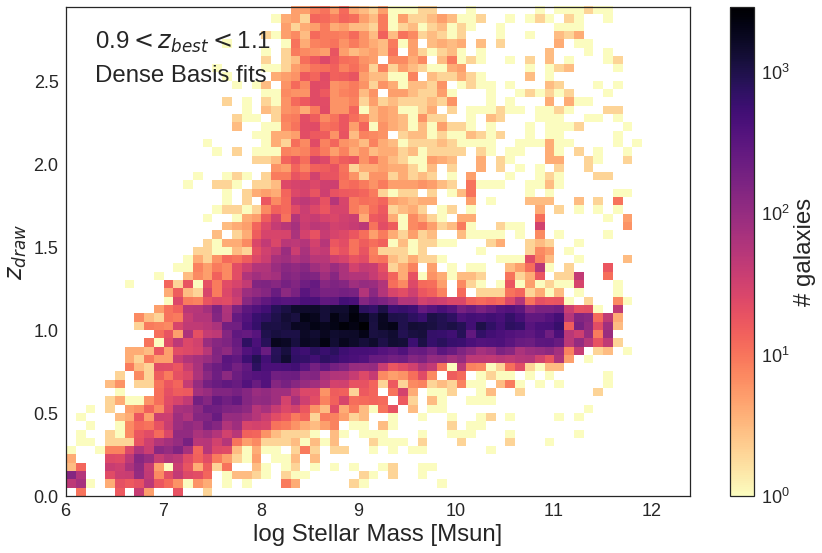

In [158]:
plt.figure(figsize=(14,9))
plt.hist2d(db_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Dense Basis fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_densebasis_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()

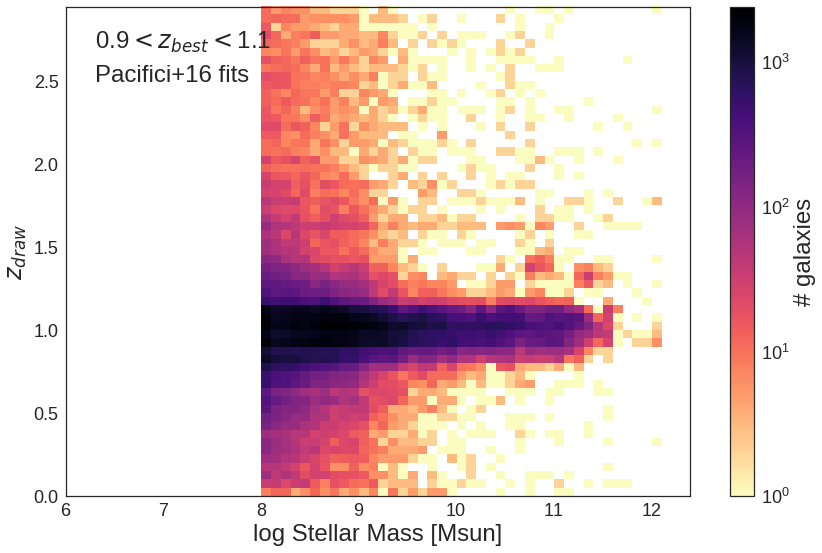

In [159]:
plt.figure(figsize=(14,9))
plt.hist2d(cami_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Pacifici+16 fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_pacifici_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()

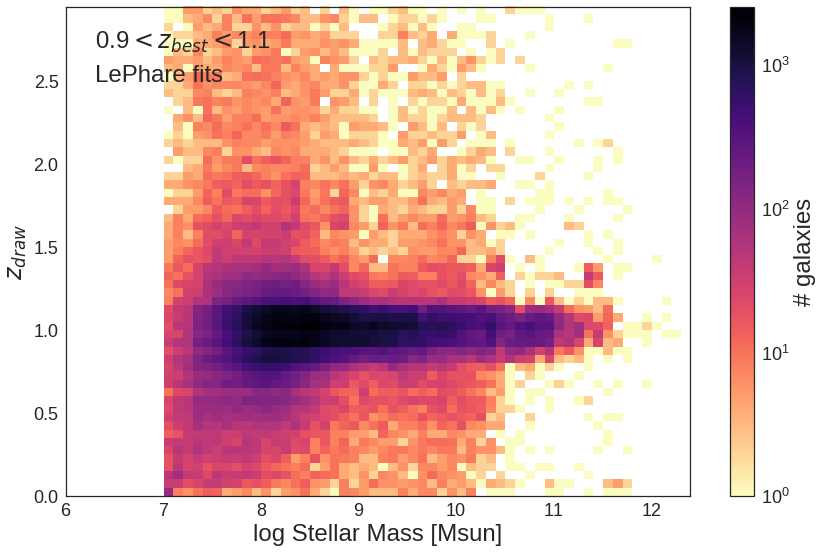

In [160]:
plt.figure(figsize=(14,9))
plt.hist2d(nima_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'LePhare fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_lephare_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()

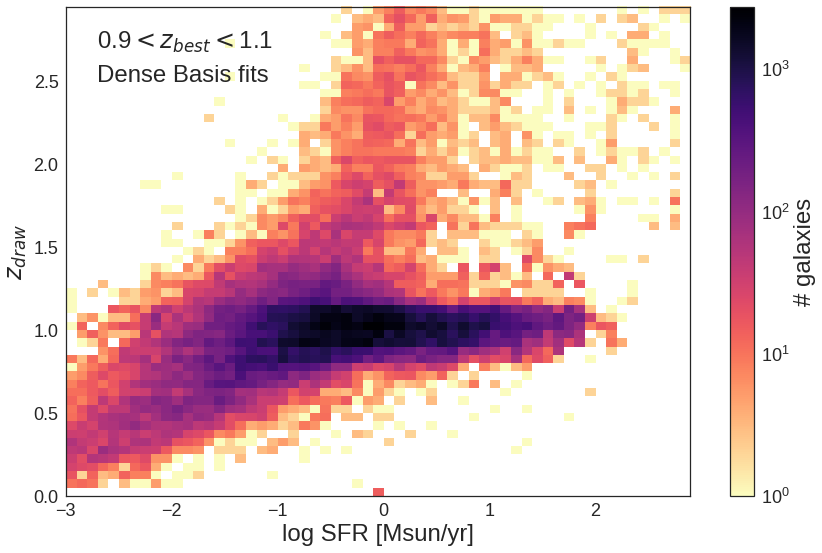

In [161]:
plt.figure(figsize=(14,9))
plt.hist2d(db_sfr[z1_mask], db_zdraw[z1_mask],(np.arange(-3,3,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log SFR [Msun/yr]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(-2.7,2.5,'Dense Basis fits',fontsize=24)
plt.text(-2.7,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_densebasis_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()


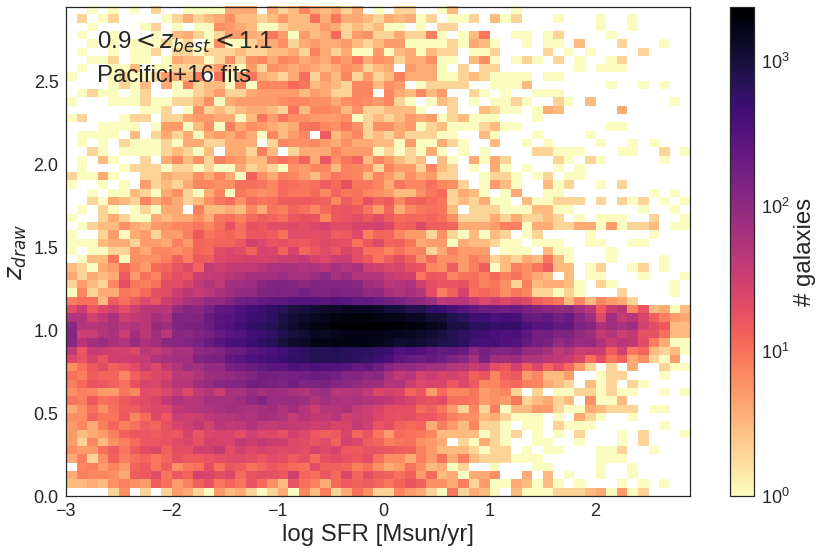

In [162]:
plt.figure(figsize=(14,9))
plt.hist2d(cami_sfr[z1_mask], db_zdraw[z1_mask],(np.arange(-3,3,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log SFR [Msun/yr]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(-2.7,2.5,'Pacifici+16 fits',fontsize=24)
plt.text(-2.7,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_pacifici_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()

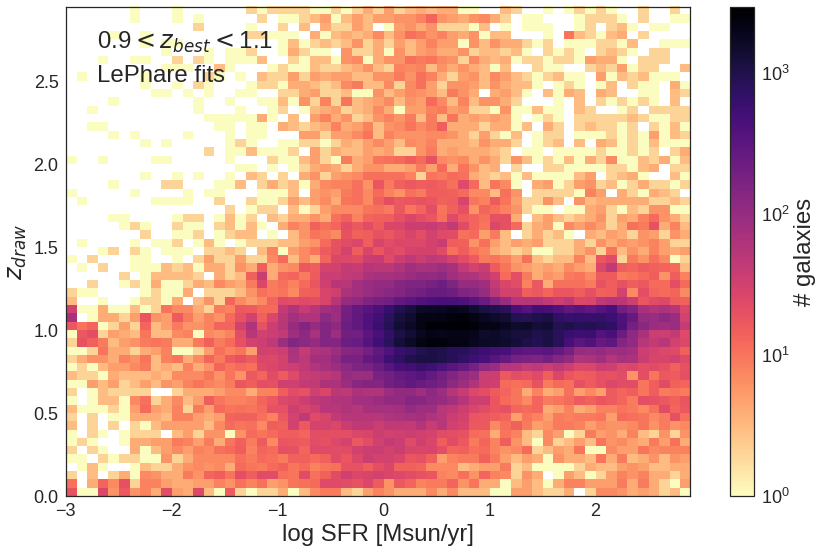

In [163]:
plt.figure(figsize=(14,9))
plt.hist2d(nima_sfr[z1_mask], db_zdraw[z1_mask],(np.arange(-3,3,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log SFR [Msun/yr]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(-2.7,2.5,'LePhare fits',fontsize=24)
plt.text(-2.7,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_lephare_z1_f160_all_logscale.png',bbox_inches='tight')
plt.show()

# now lets try things with the f160 mag < 25 cut

In [153]:
candels_ids = np.arange(len(candels_zbest))
candels_z1_ids = candels_ids[(candels_zbest>0.9) & (candels_zbest<1.1) & (goodss_f160_magval < 25)]
print('# galaxies: '+str(len(candels_z1_ids)))

make_z1_mask = np.zeros((len(db_id)))
for i in range(len(candels_z1_ids)):
  make_z1_mask[db_id == candels_z1_ids[i]] = 1
z1_mask = (make_z1_mask == 1)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


# galaxies: 1123


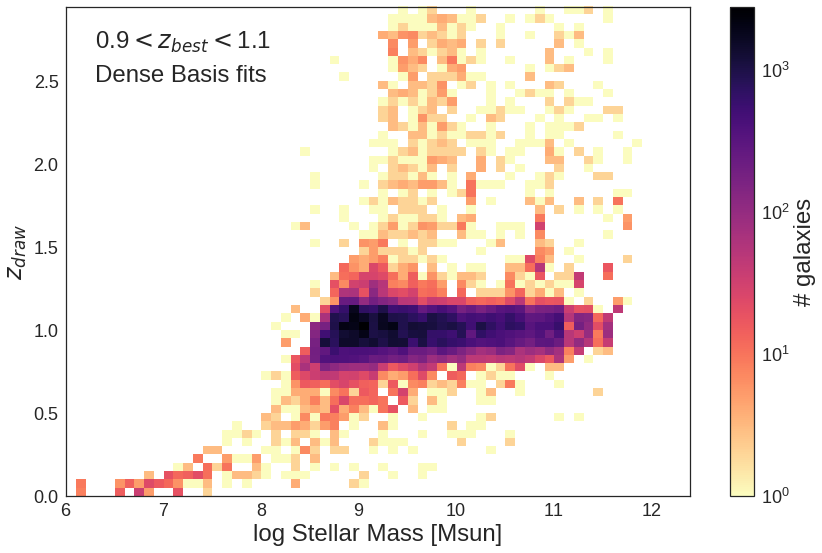

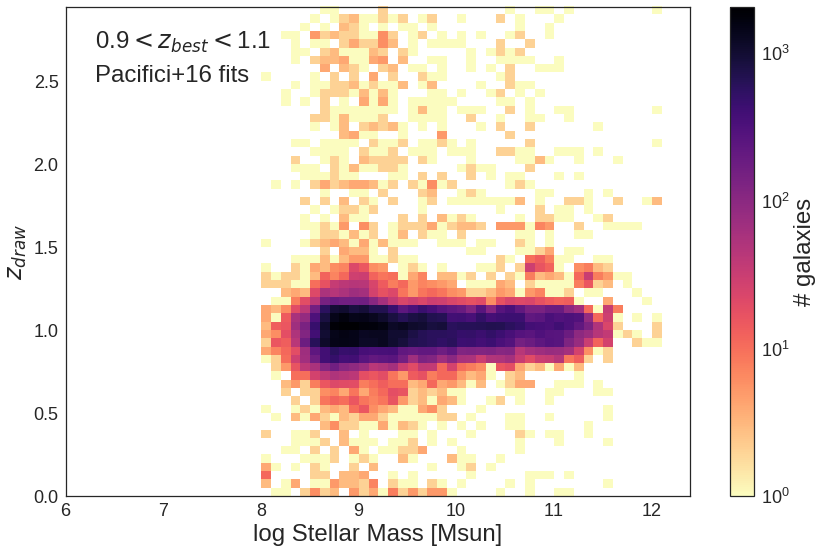

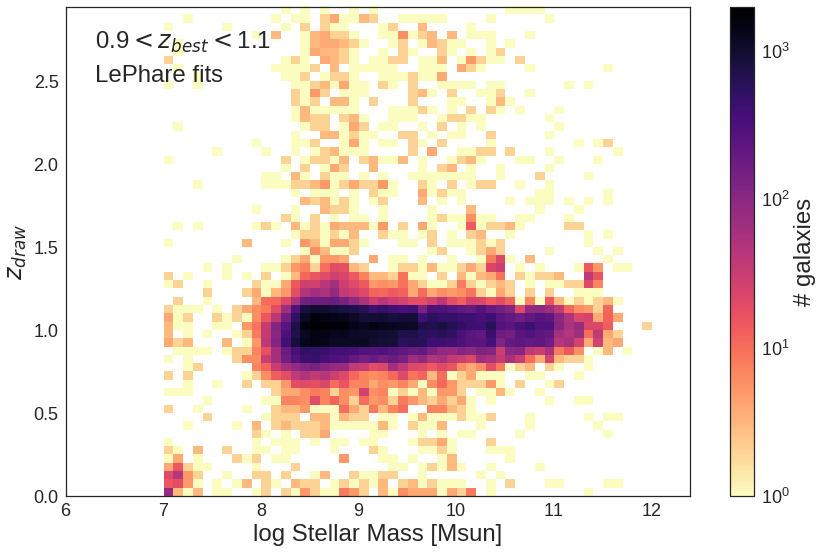

In [154]:
plt.figure(figsize=(14,9))
plt.hist2d(db_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Dense Basis fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_densebasis_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()


plt.figure(figsize=(14,9))
plt.hist2d(cami_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Pacifici+16 fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_pacifici_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()


plt.figure(figsize=(14,9))
plt.hist2d(nima_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'LePhare fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('mstar_zdraw_lephare_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()

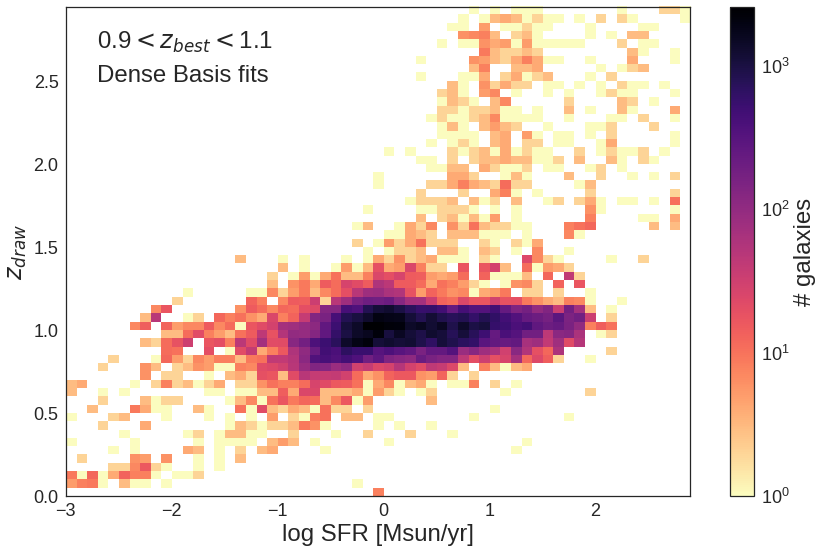

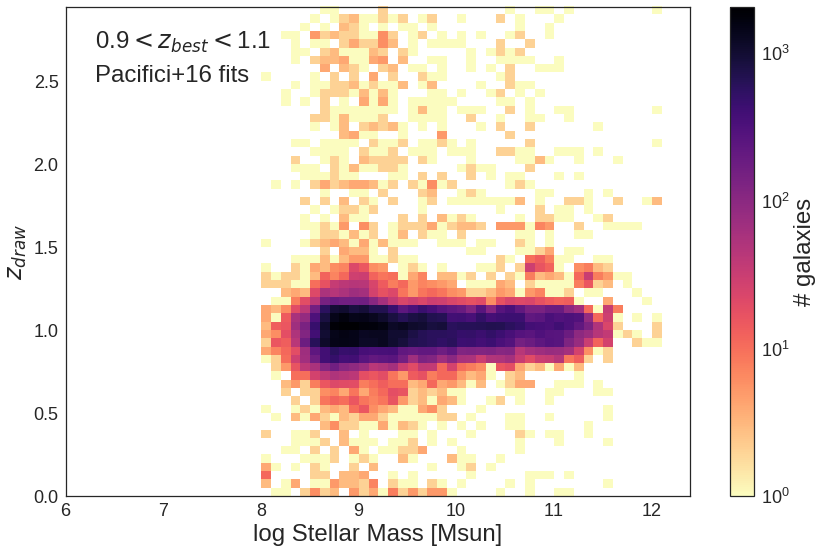

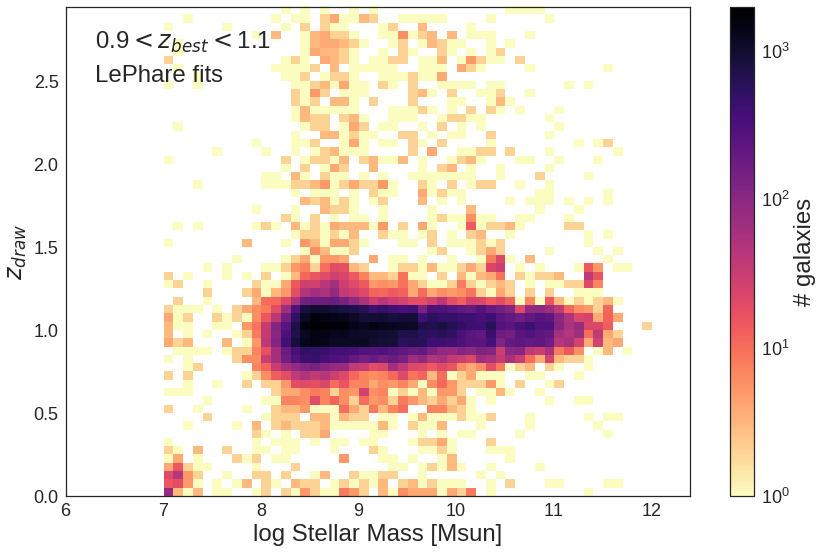

In [155]:
plt.figure(figsize=(14,9))
plt.hist2d(db_sfr[z1_mask], db_zdraw[z1_mask],(np.arange(-3,3,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log SFR [Msun/yr]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(-2.7,2.5,'Dense Basis fits',fontsize=24)
plt.text(-2.7,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_densebasis_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()



plt.figure(figsize=(14,9))
plt.hist2d(cami_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Pacifici+16 fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_pacifici_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()



plt.figure(figsize=(14,9))
plt.hist2d(nima_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r',norm = matplotlib.colors.LogNorm())
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'LePhare fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_lephare_z1_f160_25_logscale.png',bbox_inches='tight')
plt.show()

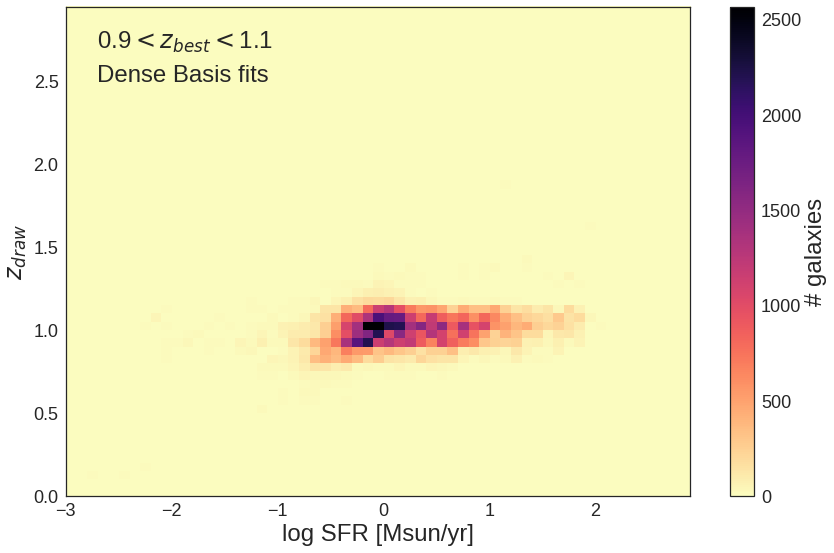

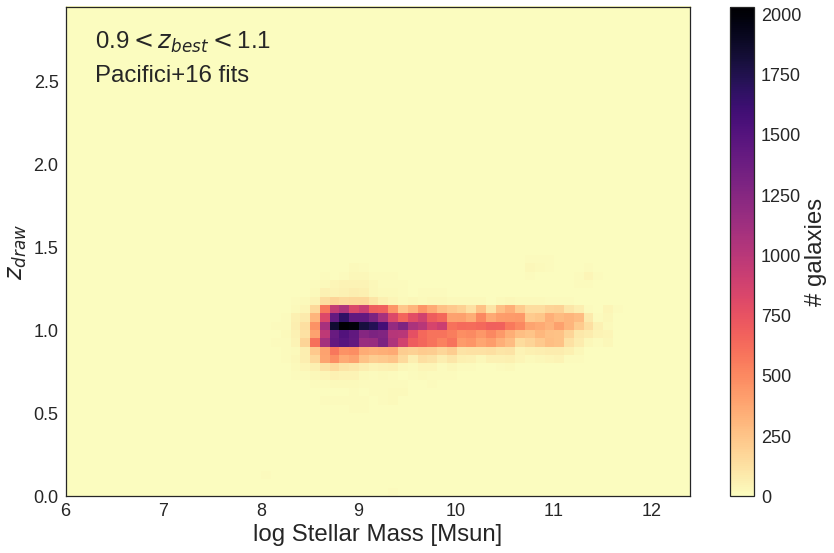

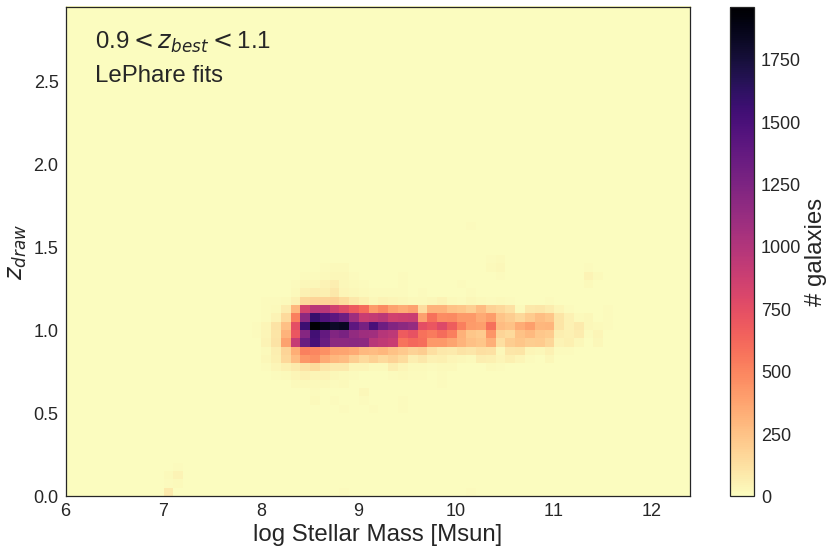

In [156]:
plt.figure(figsize=(14,9))
plt.hist2d(db_sfr[z1_mask], db_zdraw[z1_mask],(np.arange(-3,3,0.1), np.arange(0,3,0.05)),cmap='magma_r')
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log SFR [Msun/yr]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(-2.7,2.5,'Dense Basis fits',fontsize=24)
plt.text(-2.7,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_densebasis_z1_f160_25_linscale.png',bbox_inches='tight')
plt.show()


plt.figure(figsize=(14,9))
plt.hist2d(cami_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r')
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'Pacifici+16 fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_pacifici_z1_f160_25_linscale.png',bbox_inches='tight')
plt.show()


plt.figure(figsize=(14,9))
plt.hist2d(nima_mass[z1_mask], db_zdraw[z1_mask],(np.arange(6,12.5,0.1), np.arange(0,3,0.05)),cmap='magma_r')
clbr = plt.colorbar()
plt.xticks(fontsize=18);plt.yticks(fontsize=18);plt.xlabel('log Stellar Mass [Msun]',fontsize=24);plt.ylabel(r'$z_{draw}$',fontsize=24)
clbr.set_label('# galaxies',fontsize=24);clbr.ax.tick_params(labelsize=18) 
plt.text(6.3,2.5,'LePhare fits',fontsize=24)
plt.text(6.3,2.7,r'0.9$<z_{best}<$1.1',fontsize=24)
plt.savefig('sfr_zdraw_lephare_z1_f160_25_linscale.png',bbox_inches='tight')
plt.show()

In [0]:
sigma_zdraw = np.zeros((len(candels_z1_ids),))
sigma_db_mass = np.zeros((len(candels_z1_ids),))
sigma_cami_mass = np.zeros((len(candels_z1_ids),))
sigma_nima_mass = np.zeros((len(candels_z1_ids),))
sigma_db_sfr = np.zeros((len(candels_z1_ids),))
sigma_cami_sfr = np.zeros((len(candels_z1_ids),))
sigma_nima_sfr = np.zeros((len(candels_z1_ids),))

for i in range(len(candels_z1_ids)):
  
  small_zdraw = db_zdraw[db_id == candels_z1_ids[i]]
  small_db_mass =  db_mass[db_id == candels_z1_ids[i]]
  small_cami_mass =  cami_mass[db_id == candels_z1_ids[i]]
  small_nima_mass =  nima_mass[db_id == candels_z1_ids[i]]
  small_db_sfr =  db_sfr[db_id == candels_z1_ids[i]]
  small_cami_sfr =  cami_sfr[db_id == candels_z1_ids[i]]
  small_nima_sfr =  nima_sfr[db_id == candels_z1_ids[i]]

  sigma_zdraw[i] = (np.percentile(small_zdraw,84) - np.percentile(small_zdraw,16))/2
  
  sigma_db_mass[i] = (np.percentile(small_db_mass,84) - np.percentile(small_db_mass,16))/2
  sigma_cami_mass[i] = (np.percentile(small_cami_mass,84) - np.percentile(small_cami_mass,16))/2
  sigma_nima_mass[i] = (np.percentile(small_nima_mass,84) - np.percentile(small_nima_mass,16))/2
  
  sigma_db_sfr[i] = (np.percentile(small_db_sfr,84) - np.percentile(small_db_sfr,16))/2
  sigma_cami_sfr[i] = (np.percentile(small_cami_sfr,84) - np.percentile(small_cami_sfr,16))/2
  sigma_nima_sfr[i] = (np.percentile(small_nima_sfr,84) - np.percentile(small_nima_sfr,16))/2


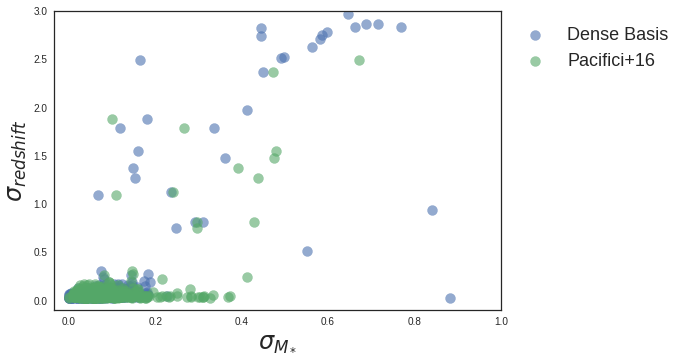

In [82]:
plt.scatter(sigma_db_mass, sigma_zdraw,s=100, alpha=0.6,label='Dense Basis')
plt.scatter(sigma_cami_mass, sigma_zdraw,s=100, alpha=0.6,label='Pacifici+16')
plt.xlabel(r'$\sigma_{M_*}$',fontsize=24);plt.ylabel(r'$\sigma_{redshift}$',fontsize=24)
plt.legend(edgecolor='w',fontsize=18,loc=2,bbox_to_anchor=(1,1))
plt.axis([-0.1/3,1,-0.1,3])
plt.show()
  

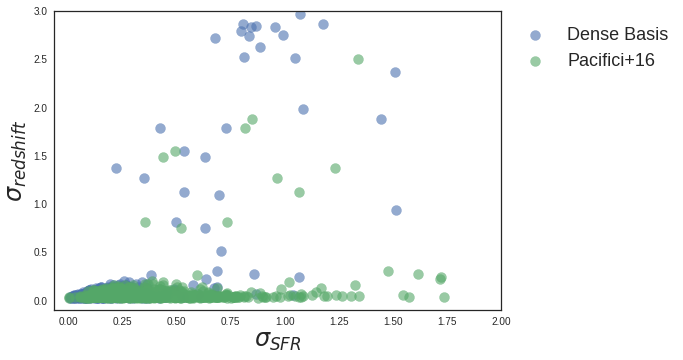

In [87]:
plt.scatter(sigma_db_sfr, sigma_zdraw,s=100, alpha=0.6,label='Dense Basis')
plt.scatter(sigma_cami_sfr, sigma_zdraw,s=100, alpha=0.6,label='Pacifici+16')
plt.xlabel(r'$\sigma_{SFR}$',fontsize=24);plt.ylabel(r'$\sigma_{redshift}$',fontsize=24)
plt.legend(edgecolor='w',fontsize=18,loc=2,bbox_to_anchor=(1,1))
plt.axis([-0.1/3*2,2,-0.1,3])
plt.show()
  

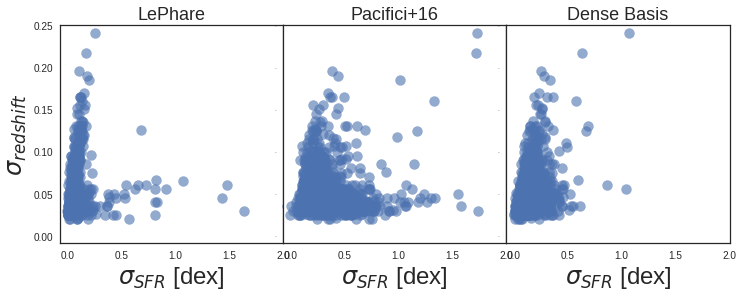

In [152]:
plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(hspace=0,wspace=0)
plt.subplot(1,3,1)
plt.scatter(sigma_nima_sfr, sigma_zdraw,s=100, alpha=0.6)
plt.title('LePhare',fontsize=18)
plt.ylabel(r'$\sigma_{redshift}$',fontsize=24)
plt.axis([-0.1/3*2,2,-0.1/12,0.25])
plt.xlabel(r'$\sigma_{SFR}$ [dex]',fontsize=24);

plt.subplot(1,3,2)
plt.scatter(sigma_cami_sfr, sigma_zdraw,s=100, alpha=0.6,label='Pacifici+16')
plt.title('Pacifici+16',fontsize=18)
plt.axis([-0.1/3*2,2,-0.1/12,0.25])
plt.xlabel(r'$\sigma_{SFR}$ [dex]',fontsize=24);plt.yticks(fontsize=0)

plt.subplot(1,3,3)
plt.scatter(sigma_db_sfr, sigma_zdraw,s=100, alpha=0.6,label='Dense Basis')
plt.title('Dense Basis',fontsize=18);plt.yticks(fontsize=0)

plt.xlabel(r'$\sigma_{SFR}$ [dex]',fontsize=24);
#plt.legend(edgecolor='w',fontsize=18,loc=2,bbox_to_anchor=(1,1))
plt.axis([-0.1/3*2,2,-0.1/12,0.25])

plt.savefig('sigma_sfr_sigma_z_allcodes_z1_f160_25.png',bbox_inches='tight')

plt.show()
  

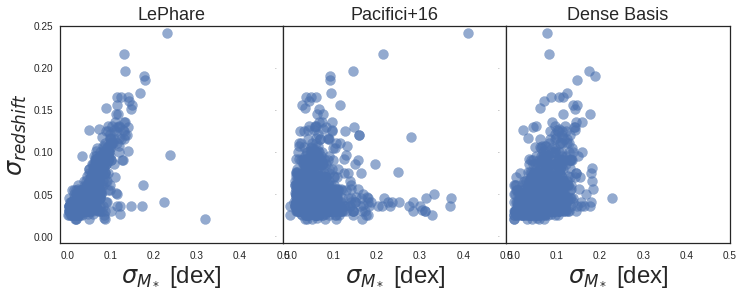

In [151]:
plt.subplots(1,3,figsize=(12,4))
plt.subplots_adjust(hspace=0,wspace=0)
plt.subplot(1,3,1)
plt.scatter(sigma_nima_mass, sigma_zdraw,s=100, alpha=0.6)
plt.title('LePhare',fontsize=18)
plt.ylabel(r'$\sigma_{redshift}$',fontsize=24)
plt.axis([-0.1/12*2,0.5,-0.1/12,0.25])
plt.xlabel(r'$\sigma_{M_*}$ [dex]',fontsize=24);

plt.subplot(1,3,2)
plt.scatter(sigma_cami_mass, sigma_zdraw,s=100, alpha=0.6,label='Pacifici+16')
plt.title('Pacifici+16',fontsize=18)
plt.axis([-0.1/12*2,0.5,-0.1/12,0.25])
plt.xlabel(r'$\sigma_{M_*}$ [dex]',fontsize=24);plt.yticks(fontsize=0)

plt.subplot(1,3,3)
plt.scatter(sigma_db_mass, sigma_zdraw,s=100, alpha=0.6,label='Dense Basis')
plt.title('Dense Basis',fontsize=18);plt.yticks(fontsize=0)

plt.xlabel(r'$\sigma_{M_*}$ [dex]',fontsize=24);
#plt.legend(edgecolor='w',fontsize=18,loc=2,bbox_to_anchor=(1,1))
plt.axis([-0.1/12*2,0.5,-0.1/12,0.25])

plt.savefig('sigma_mstar_sigma_z_allcodes_z1_f160_25.png',bbox_inches='tight')

plt.show()
  

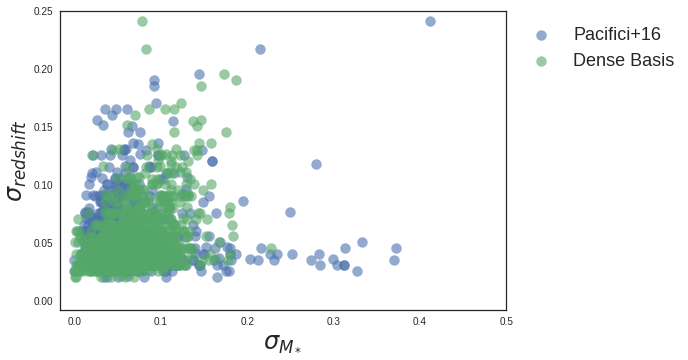

In [94]:
plt.scatter(sigma_cami_mass, sigma_zdraw,s=100, alpha=0.6,label='LePhare')
plt.scatter(sigma_cami_mass, sigma_zdraw,s=100, alpha=0.6,label='Pacifici+16')
plt.scatter(sigma_db_mass, sigma_zdraw,s=100, alpha=0.6,label='Dense Basis')

plt.xlabel(r'$\sigma_{M_*}$',fontsize=24);plt.ylabel(r'$\sigma_{redshift}$',fontsize=24)
plt.legend(edgecolor='w',fontsize=18,loc=2,bbox_to_anchor=(1,1))
plt.axis([-0.1/6,0.5,-0.1/12,0.25])
plt.show()

# Moving files back to google drive from the virtual space

In [145]:
os.listdir()

['.config',
 'sample_data',
 'sfr_zdraw_lephare_z1_f160_25_logscale.pdf',
 'sigma_mstar_sigma_z_allcodes_z1_f160_25.pdf',
 'mstar_zdraw_densebasis_z1_f160_all_logscale.pdf',
 'mstar_zdraw_pacifici_z1_f160_25_logscale.pdf',
 'mstar_zdraw_pacifici_z1_f160_all_logscale.pdf',
 'gdrive',
 'sfr_zdraw_densebasis_z1_f160_25_logscale.pdf',
 'sigma_sfr_sigma_z_z1_f160_25.pdf',
 'sfr_zdraw_pacifici_z1_f160_25_logscale.pdf',
 'sfr_zdraw_densebasis_z1_f160_25_linscale.pdf',
 'sigma_sfr_sigma_z_allcodes_z1_f160_25.pdf',
 'mstar_zdraw_densebasis_z1_f160_25_logscale.pdf',
 'sfr_zdraw_lephare_z1_f160_25_linscale.pdf',
 'mstar_zdraw_lephare_z1_f160_25_logscale.pdf',
 'sfr_zdraw_pacifici_z1_f160_25_linscale.pdf',
 'mstar_zdraw_lephare_z1_f160_all_logscale.pdf']

In [0]:
!cp *.png /content/gdrive/My\ Drive/photoz_perturbation_results

In [150]:
(os.listdir('/content/gdrive/My Drive/photoz_perturbation_results'))

['Nima_GOODSS_100_photoz.txt',
 'Dense_Basis_v2.0_goods_s_100_photoz_fits.txt',
 'mederr_GDSS_znew_avgal_newparam_100zp_idboot.fits',
 'sigma_sfr_sigma_z_allcodes_z1_f160_25.pdf',
 'sigma_mstar_sigma_z_allcodes_z1_f160_25.pdf',
 'mstar_zdraw_densebasis_z1_f160_25_logscale.pdf',
 'mstar_zdraw_densebasis_z1_f160_all_logscale.pdf',
 'mstar_zdraw_lephare_z1_f160_25_logscale.pdf',
 'mstar_zdraw_lephare_z1_f160_all_logscale.pdf',
 'mstar_zdraw_pacifici_z1_f160_25_logscale.pdf',
 'mstar_zdraw_pacifici_z1_f160_all_logscale.pdf',
 'sfr_zdraw_densebasis_z1_f160_25_linscale.pdf',
 'sfr_zdraw_densebasis_z1_f160_25_logscale.pdf',
 'sfr_zdraw_lephare_z1_f160_25_linscale.pdf',
 'sfr_zdraw_lephare_z1_f160_25_logscale.pdf',
 'sfr_zdraw_pacifici_z1_f160_25_linscale.pdf',
 'sfr_zdraw_pacifici_z1_f160_25_logscale.pdf',
 'sigma_sfr_sigma_z_z1_f160_25.pdf']